In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("F:\Robix_Intership\Task_2\Job_Salaries_Dataset.csv")
df.head()


,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           5736 non-null   object
 1   Employment Type     5736 non-null   object
 2   Experience Level    5736 non-null   object
 3   Expertise Level     5736 non-null   object
 4   Salary              5736 non-null   int64 
 5   Salary Currency     5736 non-null   object
 6   Company Location    5736 non-null   object
 7   Salary in USD       5736 non-null   int64 
 8   Employee Residence  5736 non-null   object
 9   Company Size        5736 non-null   object
 10  Year                5736 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 493.1+ KB


In [8]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['Salary'])) < 3)]

In [12]:
df.loc[:, 'Salary'] = pd.to_numeric(df['Salary'], errors='coerce')


In [16]:
df.loc[:, 'Job Title'] = df['Job Title'].astype('category')
df.loc[:, 'Company Location'] = df['Company Location'].astype('category')
print(df.dtypes)


Job Title             category
Employment Type         object
Experience Level        object
Expertise Level         object
Salary                   int64
Salary Currency         object
Company Location      category
Salary in USD            int64
Employee Residence      object
Company Size            object
Year                     int64
dtype: object


In [18]:
df[ 'Salary_range'] = pd.cut(df['Salary'], bins=[0, 50000, 100000, 150000, 200000], labels=['Low', 'Medium', 'High', 'Very High'])

In [19]:
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned data saved as 'cleaned_data.csv'")


Cleaned data saved as 'cleaned_data.csv'


In [26]:
import os 
print (os.getcwd())

C:\Users\AQSA


In [28]:
df.to_csv('F:\Robix_Intership\Task_2\Job_Salaries_Cleaned_dataset.csv', index=False)

C:\Users\AQSA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


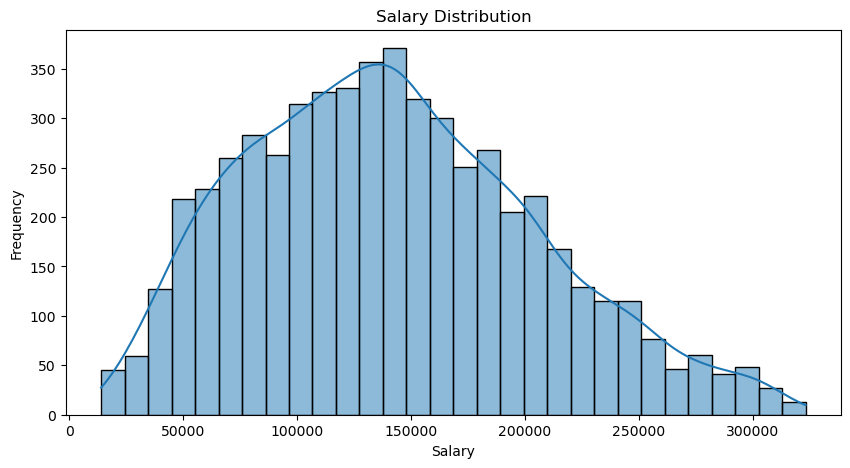

In [22]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

C:\Users\AQSA\AppData\Local\Temp\ipykernel_10664\3920050204.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Job Title', y='Salary', data=df, estimator=np.mean, ci=None)
C:\Users\AQSA\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


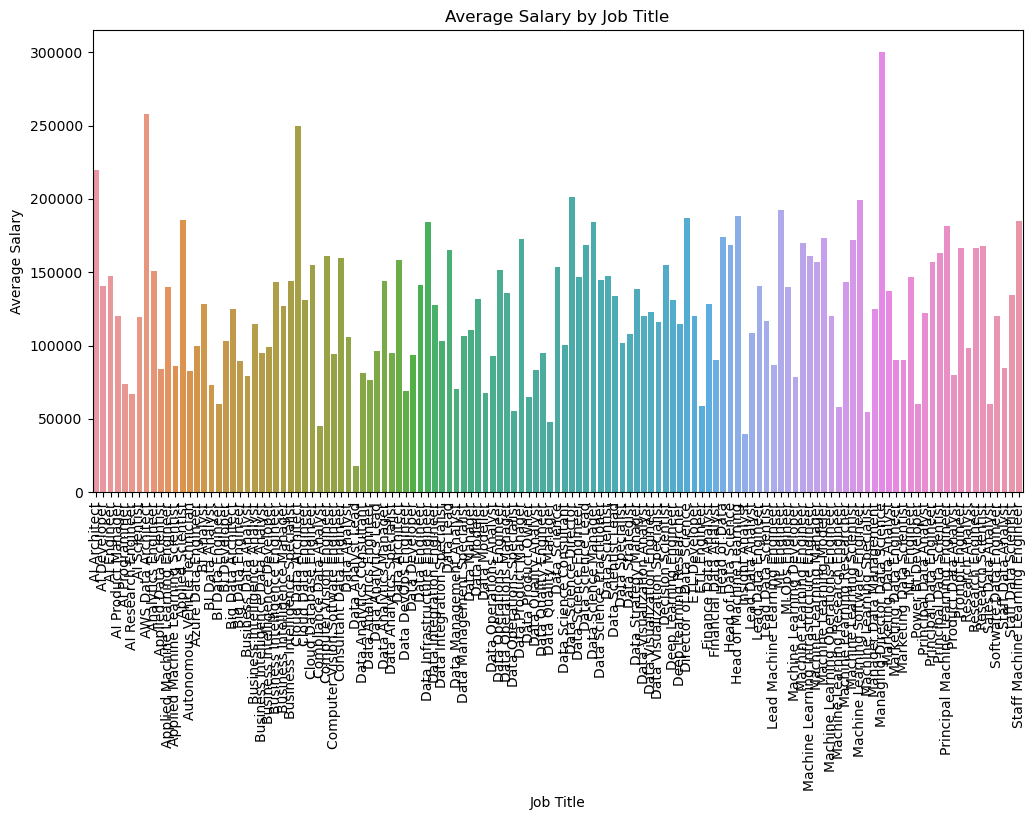

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Job Title', y='Salary', data=df, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()